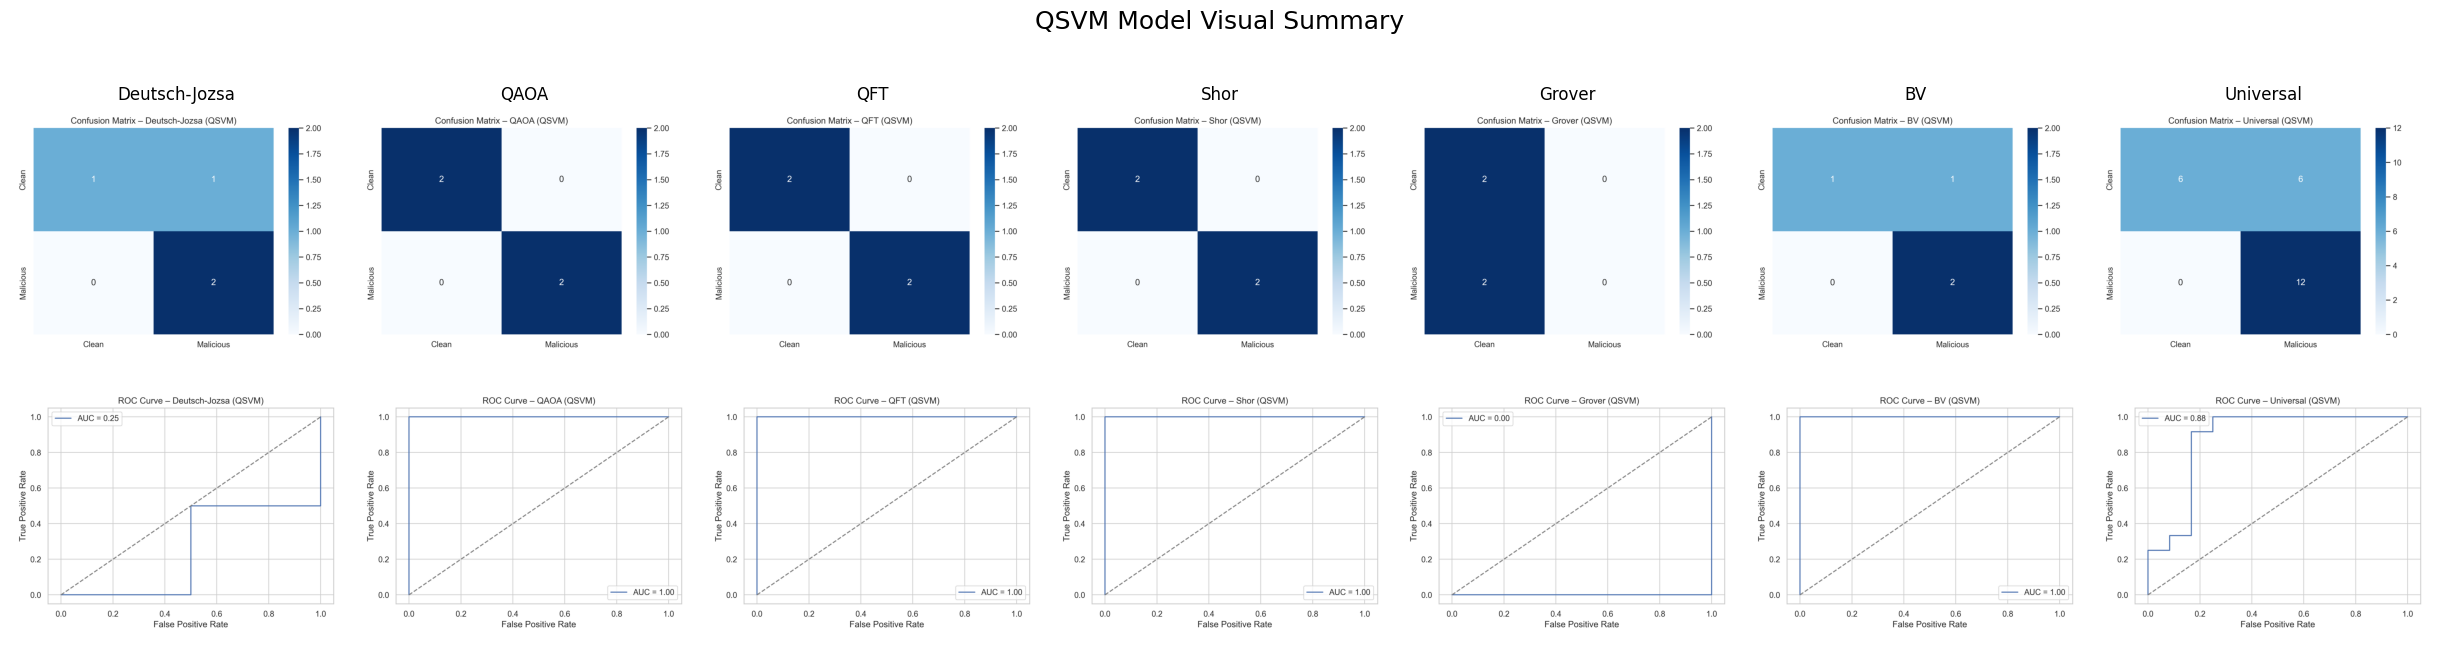

In [2]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# QSVM output folders and display names
qsvm_folders = {
    "dj": "Deutsch-Jozsa",
    "qaoa": "QAOA",
    "qft": "QFT",
    "shor": "Shor",
    "grover": "Grover",
    "bv": "BV",
    "universal": "Universal"
}

# Collect paths
confusion_paths, roc_paths, labels = [], [], []

for folder, label in qsvm_folders.items():
    cm_path = f"qsvm_outputs/{folder}/confusion_matrix.png"
    roc_path = f"qsvm_outputs/{folder}/roc_curve.png"
    if os.path.exists(cm_path) and os.path.exists(roc_path):
        confusion_paths.append(cm_path)
        roc_paths.append(roc_path)
        labels.append(label)

if confusion_paths:
    n = len(confusion_paths)

    fig, axes = plt.subplots(2, n, figsize=(3.5 * n, 7))  # portrait layout
    fig.suptitle("QSVM Model Visual Summary", fontsize=18)

    # First row – Confusion Matrices
    for i in range(n):
        img_cm = imread(confusion_paths[i])
        axes[0, i].imshow(img_cm)
        axes[0, i].axis("off")
        axes[0, i].set_title(f"{labels[i]}", fontsize=12)

    # Second row – ROC Curves
    for i in range(n):
        img_roc = imread(roc_paths[i])
        axes[1, i].imshow(img_roc)
        axes[1, i].axis("off")

    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.savefig("qsvm_summary_plots.png", dpi=300)
    plt.show()
else:
    print("⚠️ No plots found. Ensure images exist in 'qsvm_outputs/*/' folders.")
